In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

##***GO OVER THE INITIAL ATTEMPT W DATASET ERRORS

In [2]:
crime_db = pd.read_csv('ohio_crime.csv', encoding='utf-8') 

In [3]:
crime_db.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Ada,5755,7,0,2.000,nan,0,5,76.000,21,55.000,0,2.000
1,Akron,198405,1570,23,160.000,nan,528,859,9649.000,3096,5922.000,631,85.000
2,Albany,877,0,0,0.000,nan,0,0,22.000,3,19.000,0,0.000
3,Alliance,22144,83,1,14.000,nan,12,56,978.000,237,719.000,22,4.000
4,Amberley Village,3585,1,0,nan,1.000,0,0,60.000,15,39.000,6,0.000


In [4]:
crime_db.columns[3]

'Murder and\nnonnegligent\nmanslaughter'

In [5]:
crime_db.rename(columns={ crime_db.columns[3]: 'Murder'},inplace=True)
crime_db.rename(columns={ crime_db.columns[8]: 'property_crime'},inplace=True)
crime_db.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,property_crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Ada,5755,7,0,2.000,nan,0,5,76.000,21,55.000,0,2.000
1,Akron,198405,1570,23,160.000,nan,528,859,9649.000,3096,5922.000,631,85.000
2,Albany,877,0,0,0.000,nan,0,0,22.000,3,19.000,0,0.000
3,Alliance,22144,83,1,14.000,nan,12,56,978.000,237,719.000,22,4.000
4,Amberley Village,3585,1,0,nan,1.000,0,0,60.000,15,39.000,6,0.000


In [6]:
crime_db.columns

Index(['City', 'Population', 'Violent\ncrime', 'Murder',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'property_crime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [7]:
crime_db_p = crime_db[['Murder','Robbery']]
crime_db_p = crime_db_p.clip(upper=1)
crime_db_p.dropna()
crime_db_p['property_crime'] = crime_db['property_crime']

crime_db_p['Population'] = crime_db['Population']
crime_db_p['pop_sq'] = crime_db_p['Population']**2
crime_db_p.head()

,Murder,Robbery,property_crime,Population,pop_sq
0,0,0,76.000,5755,33120025
1,1,1,9649.000,198405,39364544025
2,0,0,22.000,877,769129
3,1,1,978.000,22144,490356736
4,0,0,60.000,3585,12852225


In [8]:
#crime_db_p['pop'] = crime_db['Population']
#crime_db_p['pop_sq'] = crime_db['Population']**2
#df['elderly'] = np.where(df['age']>=50, 'yes', 'no')

#crime_db_p['Murder'] = np.where(crime_db['Murder']=0, 0, 1)
#crime_db_p['Robbery'] = np.where(crime_db['Robbery']=0,0,1)

In [9]:
#crime_db_p['pop_sq'] = crime_db_p['Population']**2
#getting errors when I try to square, cant successfully convert to int...
#crime_db_p['pop_two'] = crime_db['Population']

In [10]:
crime_db_p.describe(include='all')
#print(crime_db_p.dtypes)

,Murder,Robbery,property_crime,Population,pop_sq
count,343.000,343.000,342.000,343.000,343.000
mean,0.149,0.656,561.284,16698.434,1453224452.743
std,0.356,0.476,1770.426,34319.391,10614251362.343
min,0.000,0.000,0.000,414.000,171396.000
25%,0.000,0.000,51.250,3668.500,13458198.500
50%,0.000,1.000,159.000,8387.000,70341769.000
75%,0.000,1.000,472.750,18711.000,350103042.000
max,1.000,1.000,23168.000,389181.000,151461850761.000


In [11]:
#crime_db_p = crime_db_p.astype(np.float16)

In [12]:
regr = linear_model.LinearRegression()

In [13]:
pd.options.display.max_rows = 999
crime_db_p.head(500)

,Murder,Robbery,property_crime,Population,pop_sq
0,0,0,76.000,5755,33120025
1,1,1,9649.000,198405,39364544025
2,0,0,22.000,877,769129
3,1,1,978.000,22144,490356736
4,0,0,60.000,3585,12852225
5,0,1,32.000,4870,23716900
6,0,1,147.000,12318,151733124
7,0,1,219.000,12040,144961600
8,0,0,33.000,2098,4401604
9,0,1,519.000,20306,412333636


In [15]:
crime_db_p = crime_db_p[crime_db_p['property_crime'] >= 1]

In [18]:
Y = crime_db_p['property_crime']
X = crime_db_p[['Murder','Robbery','Population', 'pop_sq']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 1.05931528e+02 -2.69205649e+01  3.73431176e-02  6.11823858e-08]

Intercept: 
 -103.27842305921251

R-squared:
0.9594704602969454


In [19]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Murder,Robbery,Population,pop_sq
Murder,1.000,0.262,0.421,0.251
Robbery,0.262,1.000,0.267,0.088
Population,0.421,0.267,1.000,0.905
pop_sq,0.251,0.088,0.905,1.000


In [ ]:
#basic thought is model should be log[property_crime] = a + murder + robbery...
#+ log[pop] + log[pop_sq]
#...
#add dummy for new york?


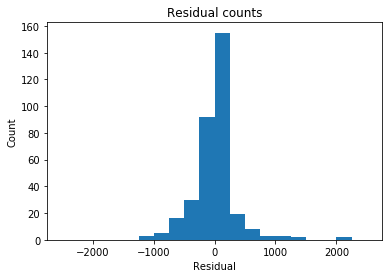

In [20]:
predicted = regr.predict(X).ravel()
actual = crime_db_p['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual, range = (-2500,2500), bins = 20)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

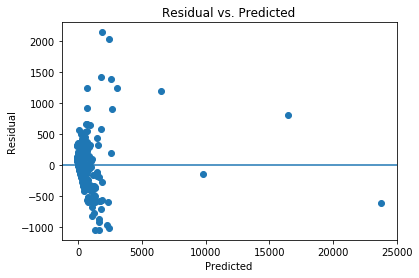

In [21]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [22]:
crime_db_p['pc_log'] = np.log10(crime_db_p.property_crime)
crime_db_p['pop_log'] = np.log10(crime_db_p.Population)
crime_db_p['pop_sq_log'] = np.log10(crime_db_p.pop_sq)
crime_db_p.head()

,Murder,Robbery,property_crime,Population,pop_sq,pc_log,pop_log,pop_sq_log
0,0,0,76.000,5755,33120025,1.881,3.760,7.520
1,1,1,9649.000,198405,39364544025,3.984,5.298,10.595
2,0,0,22.000,877,769129,1.342,2.943,5.886
3,1,1,978.000,22144,490356736,2.990,4.345,8.691
4,0,0,60.000,3585,12852225,1.778,3.554,7.109


In [24]:
#Yy = crime_db_p['pc_log']
#Xx = crime_db_p[['Murder','Robbery','pop_log','pop_sq_log']]
#regr.fit(Xx, Yy)

#print('\nCoefficients: \n', regr.coef_)
#print('\nIntercept: \n', regr.intercept_)
#print('\nR-squared:')
#print(regr.score(Xx, Yy))

#fix by removing areas where property crime equals zero... 
#or don't take the natural log when crime = zero (on error = 0)

In [25]:
crime_db_p.describe(include='all')

,Murder,Robbery,property_crime,Population,pop_sq,pc_log,pop_log,pop_sq_log
count,338.000,338.000,338.000,338.000,338.000,338.000,338.000,338.000
mean,0.148,0.663,567.926,16006.976,1236051220.355,2.215,3.915,7.830
std,0.356,0.473,1779.840,31348.611,9793246364.035,0.676,0.486,0.972
min,0.000,0.000,1.000,469.000,219961.000,0.000,2.671,5.342
25%,0.000,0.000,52.250,3686.500,13590283.000,1.718,3.567,7.133
50%,0.000,1.000,162.000,8347.000,69674009.000,2.209,3.922,7.843
75%,0.000,1.000,487.250,18624.000,346860288.000,2.688,4.270,8.540
max,1.000,1.000,23168.000,389181.000,151461850761.000,4.365,5.590,11.180


In [ ]:
#pd.options.display.max_rows = 999

#Yy.head(1000)

In [26]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std


In [47]:
linear_form = 'property_crime ~ Murder+Robbery+Population+pop_sq'
lm = smf.ols(formula = linear_form, data=crime_db_p).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         property_crime   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1971.
Date:                Tue, 14 May 2019   Prob (F-statistic):          2.51e-230
Time:                        21:08:23   Log-Likelihood:                -2467.0
No. Observations:                 338   AIC:                             4944.
Df Residuals:                     333   BIC:                             4963.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -103.2784     34.518     -2.992      0.003    -171.179     -35.378
Murder       105.9314     64.772      1.635      0.103     -21.483     233.346
Robbery      -26.9206     46.479     -0.579      0.563    -118.350      64.509
Population     0.0373      0.002     20.691      0.000       0.034       0.041
pop_sq      6.118e-08   5.33e-09     11.486      0.000    5.07e-08    7.17e-08
==============================================================================
Omnibus:                      137.782   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1163.058
Skew:                           1.460   Prob(JB):                    2.79e-253
Kurtosis:                      11.606   Cond. No.                     3.27e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
lm.params

Intercept    -103.278
Murder        105.931
Robbery       -26.921
Population      0.037
pop_sq          0.000
dtype: float64

In [29]:
lm.pvalues

Intercept    0.003
Murder       0.103
Robbery      0.563
Population   0.000
pop_sq       0.000
dtype: float64

In [30]:
lm.rsquared

0.9594704602969443

In [31]:
linear_form_alt = 'property_crime ~ Murder+Robbery+Population' 
lm2=smf.ols(formula=linear_form_alt, data=crime_db).fit()
#version with non dummy variables

In [32]:
lm2.params

Intercept    -54.829
Murder        69.112
Robbery        2.171
Population     0.031
dtype: float64

In [33]:
lm2.pvalues

Intercept    0.019
Murder       0.000
Robbery      0.000
Population   0.000
dtype: float64

In [48]:
lm2.rsquared
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         property_crime   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3654.
Date:                Tue, 14 May 2019   Prob (F-statistic):          3.80e-257
Time:                        21:09:43   Log-Likelihood:                -2442.5
No. Observations:                 342   AIC:                             4893.
Df Residuals:                     338   BIC:                             4908.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -54.8287     23.298     -2.353      0.019    -100.656      -9.001
Murder        69.1123      7.813      8.846      0.000      53.744      84.481
Robbery        2.1709      0.180     12.046      0.000       1.816       2.525
Population     0.0313      0.001     22.578      0.000       0.029       0.034
==============================================================================
Omnibus:                      238.470   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3912.084
Skew:                           2.668   Prob(JB):                         0.00
Kurtosis:                      18.686   Cond. No.                     4.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
from sklearn.model_selection import cross_val_score

In [37]:

cross_val_score(regr, X, Y, scoring='r2', cv=3)


# This will print the mean of the list of errors that were output and 
# provide your metric for evaluation


array([-8.11644587,  0.70365837,  0.69061355])

In [ ]:
## in  both OH and NY, p values were very high for the Robbery dummy var. removing from analysis

In [39]:
linear_form3 = 'property_crime ~ Murder+Population+pop_sq'
lm3 = smf.ols(formula = linear_form3, data=crime_db_p).fit()

In [40]:
lm3.rsquared

0.959429629856333

In [42]:
lm3.params

Intercept    -115.774
Murder        104.018
Population      0.037
pop_sq          0.000
dtype: float64

In [43]:
lm3.pvalues

Intercept    0.000
Murder       0.108
Population   0.000
pop_sq       0.000
dtype: float64